In [203]:
import mesa
import numpy as np
import random
import time
import numpy as np
import itertools
from mesa.visualization.modules import CanvasGrid
from mesa.space import MultiGrid
from mesa.time import SimultaneousActivation, RandomActivationByType


In [204]:
import mesa
class GrassAgent(mesa.Agent):
    def __init__(self,id, x, y, model):
        super().__init__(id, model)
        self.id = id
        self.model = model
        self.coords = x,y
        self.speed = 0
        self.desc = "Grass"
        self.state = "None"
    def step(self):
        return
    def advance(self):
        return
        
class RoadAgent(mesa.Agent):
    def __init__(self,id, x, y, model):
        super().__init__(id, model)
        self.id = id
        self.coords = x,y
        self.model = model
        self.speed = 0
        self.desc = "Road"
        self.state = "None"
    def step(self):
        return
    def advance(self):
        return

class TrafficLightAgent(mesa.Agent):
    def __init__(self,id, x, y, direction, model):
        super().__init__(id, model)
        self.id = id
        self.coords = x,y
        self.model = model
        self.direction = direction
        self.state = "Yellow"
        self.desc = "TrafficLight"
        self.speed = 0
        self.dist = 1000
    def step(self):
        self.dist=1000
        if self.direction == 0:
            print("dir 0:")
            cellList = self.model.grid.get_cell_list_contents([(self.coords[0]+1, self.coords[1]),(self.coords[0]+2, self.coords[1]), (self.coords[0]+3, self.coords[1])])
            for agent in cellList:
                print("Found agent 0:")
                newCoords = agent.coords
                aux = newCoords[0] - 1
                newCoords = aux, newCoords[1]
                print(newCoords)
                dist = newCoords[0] - self.coords[0] - 1
                print(dist)
                self.dist = dist

        if self.direction == 1:
            print("dir 1:")
            cellList = self.model.grid.get_cell_list_contents([(self.coords[0], self.coords[1]-1),(self.coords[0], self.coords[1]-2), (self.coords[0], self.coords[1]-3)])
            for agent in cellList:
                print("Found agent 1:")
                newCoords = agent.coords
                aux = newCoords[1] + 1
                newCoords = newCoords[0], aux
                print(newCoords)
                dist = self.coords[1] - newCoords[1] - 1
                print(dist)
                self.dist = dist
        
        if self.direction == 2:
            print("dir 2:")
            cellList = self.model.grid.get_cell_list_contents([(self.coords[0]-1, self.coords[1]),(self.coords[0]-2, self.coords[1]), (self.coords[0]-3, self.coords[1])])
            for agent in cellList:
                print("Found agent 2:")
                newCoords = agent.coords
                aux = newCoords[0] + 1
                newCoords = aux, newCoords[1]
                print(newCoords)
                dist = self.coords[0] - newCoords[0] - 1
                print(dist)
                self.dist = dist

        if self.direction == 3:
            print("dir 3:")
            cellList = self.model.grid.get_cell_list_contents([(self.coords[0], self.coords[1]+1),(self.coords[0], self.coords[1]+2), (self.coords[0], self.coords[1]+3)])
            for agent in cellList:
                print("Found agent 3:")
                newCoords = agent.coords
                aux = newCoords[1] - 1
                newCoords = newCoords[0], aux
                print(newCoords)
                dist = newCoords[1] - self.coords[1] - 1
                print(dist)
                self.dist = dist
        
        allLights = self.model.grid.get_cell_list_contents([(3,4), (6,5), (4,6), (5,3)])
        lowestDist = 1000
        agentLowestDist = None
        for agent in allLights:
            if type(agent) == TrafficLightAgent:
                print(agent.dist)
                if agent.dist < lowestDist:
                    agentLowestDist = agent
                    
        if agentLowestDist is not None:
            checkRoad = False

            RoadCells = self.model.grid.get_cell_list_contents([(6,5),(3,4),(4,6), (5,3), (4,4), (4,5), (5,4), (5,5)])
            for agent in RoadCells:
                if type(agent) == CarAgent:
                    checkRoad = True

            if checkRoad == False:
                agentLowestDist.state = "Green"
            if agentLowestDist.direction == 0:
                print("Hi0 " + str(agentLowestDist.dist))
                oppositeLights = self.model.grid.get_cell_list_contents([(5,3), (4,6)])
                for agent in oppositeLights:
                    if agentLowestDist.state == "Green":
                        agent.state = "Red"
                    elif agentLowestDist.state == "Red":
                        agent.state = "Green"
                sameLight = self.model.grid.get_cell_list_contents([(3,4)])
                for agent in sameLight:
                    agent.state = agentLowestDist.state

            elif agentLowestDist.direction == 1:
                print("Hi1 " + str(agentLowestDist.dist))
                oppositeLights = self.model.grid.get_cell_list_contents([(3,4), (6,5)])
                for agent in oppositeLights:
                    if agentLowestDist.state == "Green":
                        agent.state = "Red"
                    elif agentLowestDist.state == "Red":
                        agent.state = "Green"
                sameLight = self.model.grid.get_cell_list_contents([(4,6)])
                for agent in sameLight:
                    agent.state = agentLowestDist.state
            
            elif agentLowestDist.direction == 2:
                print("Hi2 " + str(agentLowestDist.dist))
                oppositeLights = self.model.grid.get_cell_list_contents([(5,3), (4,6)])
                for agent in oppositeLights:
                    if agentLowestDist.state == "Green":
                        agent.state = "Red"
                    elif agentLowestDist.state == "Red":
                        agent.state = "Green"
                sameLight = self.model.grid.get_cell_list_contents([(6,5)])
                for agent in sameLight:
                    agent.state = agentLowestDist.state
            
            elif agentLowestDist.direction == 3:
                print("Hi3 " + str(agentLowestDist.dist))
                oppositeLights = self.model.grid.get_cell_list_contents([(3,4), (6,5)])
                for agent in oppositeLights:
                    if agentLowestDist.state == "Green":
                        agent.state = "Red"
                    elif agentLowestDist.state == "Red":
                        agent.state = "Green"
                sameLight = self.model.grid.get_cell_list_contents([(5,3)])
                for agent in sameLight:
                    agent.state = agentLowestDist.state
        
        
        return

    def advance(self):
        return

class CarAgent(mesa.Agent):
    def __init__(self,id, x, y, direction, model):
        super().__init__(id, model)
        self.id = id
        self.coords = x,y
        self.model = model
        self.speed = np.random.choice(np.arange(1, 4), p=[0.3, 0.4, 0.3])
        self.next_pos = None
        self.direction = direction
        self.desc = "car"
        self.state = "None"
    def step(self):

        

        if self.direction == 0: 
            lightCheck = ""
            if self.coords[0] != 9:
                checkLight = self.model.grid.get_cell_list_contents([(self.coords[0]+1,self.coords[1])])
                for agent in checkLight:
                    if type(agent) == TrafficLightAgent:
                        lightCheck = agent.state
            if lightCheck == "Green" or lightCheck == "":
                if(self.coords[0] < 9):
                    if self.model.time % self.speed == 0:
                        self.next_pos = self.coords[0]+1, self.coords[1]
                else:
                    self.next_pos = self.coords[0], self.coords[1]+1
                    self.direction = 2

        elif self.direction == 1:
            lightCheck = ""
            if self.coords[1] != 0:
                checkLight = self.model.grid.get_cell_list_contents([(self.coords[0],self.coords[1]-1)])
                for agent in checkLight:
                    if type(agent) == TrafficLightAgent:
                        lightCheck = agent.state
            if lightCheck == "Green" or lightCheck == "":
                if(self.coords[1] > 0):
                    if self.model.time % self.speed == 0:
                        self.next_pos = self.coords[0], self.coords[1]-1
                else:
                    self.next_pos = self.coords[0]+1, self.coords[1]
                    self.direction = 3
            elif lightCheck == "Red":
                self.speed = 1
                self.next_pos = self.coords[0], self.coords[1]-1

        elif self.direction == 2:
            lightCheck = ""
            if self.coords[0] != 0:
                checkLight = self.model.grid.get_cell_list_contents([(self.coords[0]-1,self.coords[1])])
                for agent in checkLight:
                    if type(agent) == TrafficLightAgent:
                        lightCheck = agent.state
            if lightCheck == "Green" or lightCheck == "":
                if(self.coords[0] > 0):
                    if self.model.time % self.speed == 0:
                        self.next_pos = self.coords[0]-1, self.coords[1]
                else:
                    self.next_pos = self.coords[0], self.coords[1]-1
                    self.direction = 0

        elif self.direction == 3:
            lightCheck = ""
            if self.coords[1] != 9:
                checkLight = self.model.grid.get_cell_list_contents([(self.coords[0],self.coords[1]+1)])
                for agent in checkLight:
                    if type(agent) == TrafficLightAgent:
                        lightCheck = agent.state
            if lightCheck == "Green" or lightCheck == "":
                if(self.coords[1] < 9):
                    if self.model.time % self.speed == 0:
                        self.next_pos = self.coords[0], self.coords[1]+1
                else:
                    self.next_pos = self.coords[0]-1, self.coords[1]
                    self.direction = 1
            elif lightCheck == "Red":
                self.speed = 1
                self.next_pos = self.coords[0], self.coords[1]+1

    def advance(self):
        if self.next_pos is not None:
            self.coords = self.next_pos
            self.model.grid.move_agent(self,self.coords)


#Agente diferente
class CarAgentDif(mesa.Agent):
    def __init__(self,id, x, y, direction, model):
        super().__init__(id, model)
        self.id = id
        self.coords = x,y
        self.model = model
        self.speed = np.random.choice(np.arange(1, 4), p=[0.3, 0.4, 0.3])
        self.next_pos = None
        self.direction = direction
        self.desc = "car"
        self.state = "None"
    def step(self):
        if self.direction == 0: 
            lightCheck = ""
            if self.coords[0] != 9:
                checkLight = self.model.grid.get_cell_list_contents([(self.coords[0]+1,self.coords[1])])
                for agent in checkLight:
                    if type(agent) == TrafficLightAgent:
                        lightCheck = agent.state
            if lightCheck == "Green" or lightCheck == "":
                if(self.coords[0] < 9):
                    if self.model.time % self.speed == 0:
                        self.next_pos = self.coords[0]+1, self.coords[1]
                else:
                    self.next_pos = self.coords[0], self.coords[1]+1
                    self.direction = 2

        elif self.direction == 1:
            lightCheck = ""
            if self.coords[1] != 0:
                checkLight = self.model.grid.get_cell_list_contents([(self.coords[0],self.coords[1]-1)])
                for agent in checkLight:
                    if type(agent) == TrafficLightAgent:
                        lightCheck = agent.state
            if lightCheck == "Green" or lightCheck == "":
                if(self.coords[1] > 0):
                    if self.model.time % self.speed == 0:
                        self.next_pos = self.coords[0], self.coords[1]-1
                else:
                    self.next_pos = self.coords[0]+1, self.coords[1]
                    self.direction = 3

        elif self.direction == 2:
            lightCheck = ""
            if self.coords[0] != 0:
                checkLight = self.model.grid.get_cell_list_contents([(self.coords[0]-1,self.coords[1])])
                for agent in checkLight:
                    if type(agent) == TrafficLightAgent:
                        lightCheck = agent.state
            if lightCheck == "Green" or lightCheck == "":
                if(self.coords[0] > 0):
                    if self.model.time % self.speed == 0:
                        self.next_pos = self.coords[0]-1, self.coords[1]
                else:
                    self.next_pos = self.coords[0], self.coords[1]-1
                    self.direction = 0

        elif self.direction == 3:
            lightCheck = ""
            if self.coords[1] != 9:
                checkLight = self.model.grid.get_cell_list_contents([(self.coords[0],self.coords[1]+1)])
                for agent in checkLight:
                    if type(agent) == TrafficLightAgent:
                        lightCheck = agent.state
            if lightCheck == "Green" or lightCheck == "":
                if(self.coords[1] < 9):
                    if self.model.time % self.speed == 0:
                        self.next_pos = self.coords[0], self.coords[1]+1
                else:
                    self.next_pos = self.coords[0]-1, self.coords[1]
                    self.direction = 1
    def advance(self):
        if self.next_pos is not None:
            self.coords = self.next_pos
            self.model.grid.move_agent(self,self.coords)
class StreetModel(mesa.Model):
    def __init__(self,M,N):
        self.grid = MultiGrid(M,N,False)
        self.x = M
        self.y = N
        self.schedule = SimultaneousActivation(self)
        self.running = True
        self.id = 0
        self.time = 0
        self.kill_agents = []

        self.datacollector = mesa.DataCollector(
            agent_reporters={"Speed": "speed", "Coordenadas":"coords","Luz":"state", "Description":"desc" }
        )
        
        pos = [0,1,2,3,6,7,8,9]
        for i in pos:
            for j in pos:
                a = GrassAgent(self.id, i, j, self)
                self.grid.place_agent(a, (i, j))
                self.schedule.add(a)
                self.id = self.id + 1
        
        posTraffic = [[3,4,2], [6,5,0], [4,6,3], [5,3,1]]

        for i in posTraffic:
            a = TrafficLightAgent(self.id, i[0], i[1], i[2], self)
            self.grid.place_agent(a, (i[0], i[1]))
            self.schedule.add(a)
            self.id = self.id + 1

        a = CarAgentDif(self.id, 0, 4, 0, self)
        self.grid.place_agent(a, (0, 4))
        self.schedule.add(a)
        self.id = self.id + 1

        a = CarAgent(self.id, 9, 5, 2, self)
        self.grid.place_agent(a, (9, 5))
        self.schedule.add(a)
        self.id = self.id + 1

        a = CarAgent(self.id, 5, 0, 3, self)
        self.grid.place_agent(a, (5, 0))
        self.schedule.add(a)
        self.id = self.id + 1

        a = CarAgent(self.id, 4, 9, 1, self)
        self.grid.place_agent(a, (4, 9))
        self.schedule.add(a)
        self.id = self.id + 1

        a = RoadAgent(self.id, 4, 4, self)
        self.grid.place_agent(a, (4, 4))
        self.schedule.add(a)
        self.id = self.id + 1

        a = RoadAgent(self.id, 4, 5, self)
        self.grid.place_agent(a, (4, 5))
        self.schedule.add(a)
        self.id = self.id + 1

        a = RoadAgent(self.id, 5, 4, self)
        self.grid.place_agent(a, (5, 4))
        self.schedule.add(a)
        self.id = self.id + 1

        a = RoadAgent(self.id, 5, 5, self)
        self.grid.place_agent(a, (5, 5))
        self.schedule.add(a)
        self.id = self.id + 1


        
                
    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)
        self.time += 1
        for x in self.kill_agents:
            self.grid.remove_agent(x)
            self.schedule.remove(x)
            self.kill_agents.remove(x)

In [205]:
params = {
    "M": 10,
    "N": 10,
}
results = mesa.batch_run(
    StreetModel,
    parameters=params,
    iterations=5,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 31.10it/s]

dir 2:
Found agent 2:
(1, 4)
1
1
1000
1000
1000
Hi2 1
dir 0:
Found agent 0:
(8, 5)
1
1
1
1000
1000
Hi0 1
dir 3:
Found agent 3:
(4, 8)
1
1
1
1
1000
Hi3 1
dir 1:
Found agent 1:
(5, 1)
1
1
1
1
1
Hi1 1
dir 2:
Found agent 2:
(2, 4)
0
0
1
1
1
Hi1 1
dir 0:
Found agent 0:
(7, 5)
0
0
0
1
1
Hi1 1
dir 3:
Found agent 3:
(4, 7)
0
0
0
0
1
Hi1 1
dir 1:
Found agent 1:
(5, 2)
0
0
0
0
0
Hi1 0
dir 2:
Found agent 2:
(2, 4)
0
0
0
0
0
Hi1 0
dir 0:
Found agent 0:
(7, 5)
0
0
0
0
0
Hi1 0
dir 3:
Found agent 3:
(4, 7)
0
0
0
0
0
Hi1 0
dir 1:
Found agent 1:
(5, 2)
0
0
0
0
0
Hi1 0
dir 2:
Found agent 2:
(2, 4)
0
0
0
0
0
Hi1 0
dir 0:
Found agent 0:
(6, 5)
-1
0
-1
0
0
Hi1 0
dir 3:
Found agent 3:
(4, 7)
0
0
-1
0
0
Hi1 0
dir 1:
Found agent 1:
(5, 3)
-1
0
-1
0
-1
Hi1 -1
dir 2:
Found agent 2:
(3, 4)
-1
-1
-1
0
-1
Hi1 -1
dir 0:
Found agent 0:
(6, 5)
-1
-1
-1
0
-1
Hi1 -1
dir 3:
Found agent 3:
(4, 6)
-1
-1
-1
-1
-1
Hi1 -1
dir 1:
Found agent 1:
(5, 3)
-1
-1
-1
-1
-1
Hi1 -1
dir 2:
Found agent 2:
(3, 4)
-1
-1
-1
-1
-1
Hi1 -1
di

In [206]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'M', 'N', 'AgentID', 'Speed',
       'Coordenadas', 'Luz', 'Description'],
      dtype='object')


In [207]:
print(results_df)

       RunId  iteration  Step   M   N  AgentID  Speed Coordenadas    Luz  \
0          0          0     0  10  10      NaN    NaN         NaN    NaN   
1          0          0     1  10  10      0.0    0.0      (0, 0)   None   
2          0          0     1  10  10      1.0    0.0      (0, 1)   None   
3          0          0     1  10  10      2.0    0.0      (0, 2)   None   
4          0          0     1  10  10      3.0    0.0      (0, 3)   None   
...      ...        ...   ...  ..  ..      ...    ...         ...    ...   
38000      4          4   100  10  10     71.0    2.0      (5, 5)  Green   
38001      4          4   100  10  10     72.0    0.0      (4, 4)   None   
38002      4          4   100  10  10     73.0    0.0      (4, 5)   None   
38003      4          4   100  10  10     74.0    0.0      (5, 4)   None   
38004      4          4   100  10  10     75.0    0.0      (5, 5)   None   

      Description  
0             NaN  
1           Grass  
2           Grass  
3      

In [208]:
results_filtered = results_df[(results_df.Speed > 0) & (results_df.Luz != "None")]
print(results_filtered)

       RunId  iteration  Step   M   N  AgentID  Speed Coordenadas    Luz  \
451        0          0     6  10  10     70.0    2.0      (5, 3)  Green   
527        0          0     7  10  10     70.0    2.0      (5, 4)  Green   
603        0          0     8  10  10     70.0    2.0      (5, 4)  Green   
604        0          0     8  10  10     71.0    3.0      (4, 6)  Green   
679        0          0     9  10  10     70.0    2.0      (5, 5)  Green   
...      ...        ...   ...  ..  ..      ...    ...         ...    ...   
37924      4          4    99  10  10     71.0    2.0      (5, 5)  Green   
37997      4          4   100  10  10     68.0    1.0      (7, 5)  Green   
37998      4          4   100  10  10     69.0    1.0      (2, 4)  Green   
37999      4          4   100  10  10     70.0    1.0      (5, 0)  Green   
38000      4          4   100  10  10     71.0    2.0      (5, 5)  Green   

      Description  
451           car  
527           car  
603           car  
604    

Text(0, 0.5, 'Velocidad')

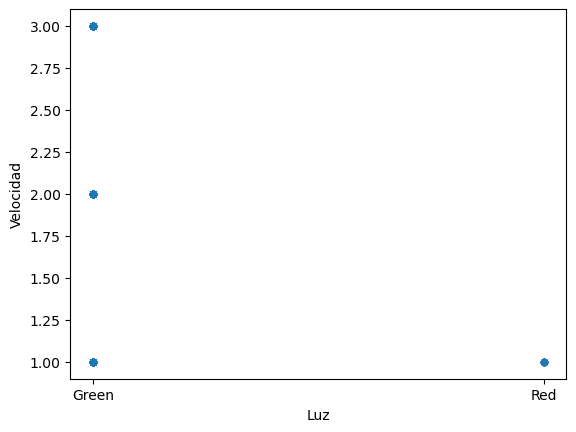

In [209]:
#Esta gráfica nos permite ver cuál es la velocidad que tiene cada conductor de acuerdo al
# color del semáforo
graf2 =results_filtered.plot(x='Luz', y='Speed', kind='scatter')
graf2.set_xlabel("Luz")
graf2.set_ylabel("Velocidad")

In [210]:
df = results_df[(results_df.Speed > 0) & (results_df.Description == "car")]
df.tail()


,RunId,iteration,Step,M,N,AgentID,Speed,Coordenadas,Luz,Description
37924,4,4,99,10,10,71.0,2.0,"(5, 5)",Green,car
37997,4,4,100,10,10,68.0,1.0,"(7, 5)",Green,car
37998,4,4,100,10,10,69.0,1.0,"(2, 4)",Green,car
37999,4,4,100,10,10,70.0,1.0,"(5, 0)",Green,car
38000,4,4,100,10,10,71.0,2.0,"(5, 5)",Green,car


In [211]:
df1 = results_df[(results_df.Speed > 0) & (results_df.Description == "car") & (results_df.AgentID == 68)]
df2 = results_df[(results_df.Speed > 0) & (results_df.Description == "car") & (results_df.AgentID == 69)]
df3 = results_df[(results_df.Speed > 0) & (results_df.Description == "car") & (results_df.AgentID == 70)]
df4 = results_df[(results_df.Speed > 0) & (results_df.Description == "car") & (results_df.AgentID == 71)]

v1 = df1['Speed'].mean()
v2 = df2['Speed'].mean()
v3 = df3['Speed'].mean()
v4 = df4['Speed'].mean()


x=[]
x.append(v1)
x.append(v2)
x.append(v3)
x.append(v4)
y=[1,2,3,4]

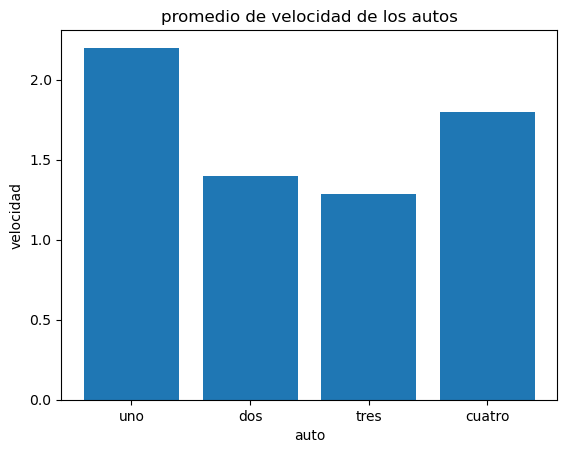

In [212]:
#promedio de velocidad de los autos
import matplotlib.pyplot as plt
  
left = y
height = x
tick_label = ['uno', 'dos', 'tres', 'cuatro']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label)
  

plt.xlabel('auto')
plt.ylabel('velocidad')
plt.title('promedio de velocidad de los autos')

plt.show()

In [213]:
green = results_df[(results_df.Luz == "Green")]['Luz'].count()
red = results_df[(results_df.Luz == "Red")]['Luz'].count()
print(green)
print(red)

2609
1010


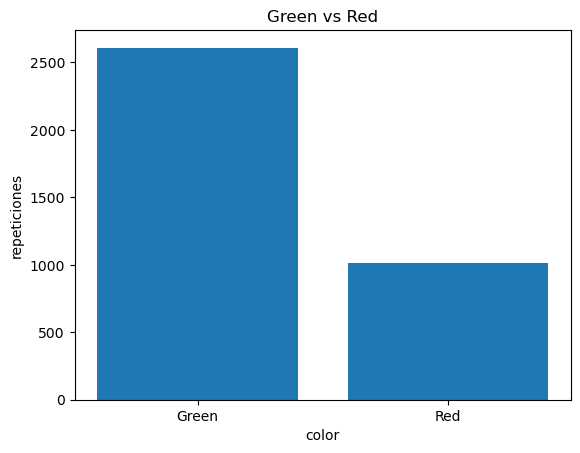

In [214]:
#Esta gráfica nos permite ver que es color de luz del semáfor es más comun a que aparezca
luces = []
luces.append(green)
luces.append(red)
num=[1,2]
left = num
height = luces
tick_label = ['Green', 'Red']
plt.bar(left, height, tick_label = tick_label,
        width = 0.8 )

plt.xlabel('color')
plt.ylabel('repeticiones')
plt.title('Green vs Red')

plt.show()

In [215]:
a= results_df[(results_df.Description == "car")]
cor = a['Coordenadas']. unique ()
print(cor)

[(1, 4) (8, 5) (5, 1) (4, 8) (7, 5) (5, 2) (2, 4) (4, 7) (5, 3) (5, 4)
 (4, 6) (5, 5) (4, 5) (5, 6) (5, 7) (4, 4) (5, 8) (4, 3) (6, 5) (5, 9)
 (4, 9) (3, 4) (4, 2) (4, 1) (3, 5) (2, 5) (4, 0) (5, 0) (1, 5) (6, 4)
 (0, 5) (0, 4) (7, 4) (8, 4) (9, 4) (9, 5)]


In [216]:
numchoques = []
numChoques0 = 0
for number in range(0, 100, 1):
    ste = a[(a.Step == number) & (a.RunId == 0) ]
    for c in cor:
        cho = ste[(ste.Coordenadas == c)]
        if not cho.empty:
            choques = cho['AgentID'].count()
            if choques > 1:
                numChoques0 = numChoques0 +1
                
print(numChoques0)
numchoques.append(numChoques0)    

numChoques1 = 0
for number in range(0, 100, 1):
    ste = a[(a.Step == number) & (a.RunId == 1) ]
    for c in cor:
        cho = ste[(ste.Coordenadas == c)]
        if not cho.empty:
            choques = cho['AgentID'].count()
            if choques > 1:
                numChoques1 = numChoques1 +1               
            
            
print(numChoques1)
numchoques.append(numChoques1 ) 
numChoques2 = 0
for number in range(0, 100, 1):
    ste = a[(a.Step == number) & (a.RunId == 2) ]
    for c in cor:
        cho = ste[(ste.Coordenadas == c)]
        if not cho.empty:
            choques = cho['AgentID'].count()
            if choques > 1:
                numChoques2 = numChoques2 +1               
            
            
print(numChoques2)
numchoques.append(numChoques2) 
numChoques3 = 0
for number in range(0, 100, 1):
    ste = a[(a.Step == number) & (a.RunId == 3) ]
    for c in cor:
        cho = ste[(ste.Coordenadas == c)]
        if not cho.empty:
            choques = cho['AgentID'].count()
            if choques > 1:
                numChoques3 = numChoques3 +1               
            
            
print(numChoques3)
numchoques.append(numChoques3)

numChoques4 = 0
for number in range(0, 100, 1):
    ste = a[(a.Step == number) & (a.RunId == 4) ]
    for c in cor:
        cho = ste[(ste.Coordenadas == c)]
        if not cho.empty:
            choques = cho['AgentID'].count()
            if choques > 1:
                numChoques4 = numChoques4 +1               
            
            
print(numChoques4)
numchoques.append(numChoques3)


6
0
9
4
4


In [217]:
print(numchoques)

[6, 0, 9, 4, 4]


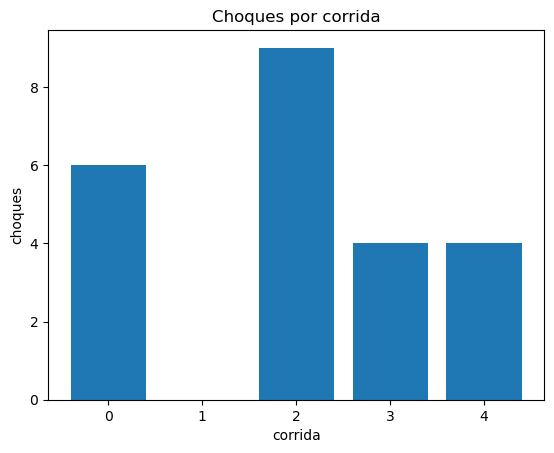

In [218]:
#Esta gráfica nos ayuda a conocer el número de choques que se presentan a lo largo de corrida
runs=[0,1,2,3,4]
r = runs
c = numchoques
plt.bar(r, c)

plt.xlabel('corrida')
plt.ylabel('choques')
plt.title('Choques por corrida')

plt.show()